In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from copy import copy

### Find top cities

In [32]:
cities = pd.read_csv("cities.csv")
cities["Население"] = pd.to_numeric(cities["Население"])
cities = cities.sort_values("Население", ascending=False)

top_cities = cities.iloc[:30]
top_cities = top_cities[["Долгота", "Широта", "Город", "Население"]]
top_cities.reset_index(inplace=True)
top_cities.at[0, "Город"] = "Москва"
top_cities.at[1, "Город"] = "Санкт-Петербург"

In [33]:
top_cities = cities.iloc[:30]
top_cities = top_cities[["Долгота", "Широта", "Город", "Население"]]
top_cities.reset_index(inplace=True)
top_cities.at[0, "Город"] = "Москва"
top_cities.at[1, "Город"] = "Санкт-Петербург"

In [54]:
top_cities

,index,Долгота,Широта,Город,Население
0,506,37.620373,55.753879,Москва,11514330
1,782,30.315822,59.939125,Санкт-Петербург,4848742
2,643,82.921057,55.028102,Новосибирск,1498921
3,828,60.605489,56.838633,Екатеринбург,1377738
4,615,44.005395,56.324209,Нижний Новгород,1250615
5,924,49.111531,55.794388,Казань,1216965
6,778,50.106769,53.195166,Самара,1164900
7,652,73.367464,54.984814,Омск,1154000
8,1060,61.400786,55.160366,Челябинск,1130273
9,753,39.718787,47.222436,Ростов-на-Дону,1091544


### Distance function

In [36]:
from math import radians, cos, sin, asin, sqrt

def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    # Radius of earth in kilometers is 6371
    km = 6371* c
    
    return km

In [38]:
haversine(top_cities.iloc[0]["Долгота"], top_cities.iloc[0]["Широта"], top_cities.iloc[0]["Долгота"], top_cities.iloc[1]["Широта"])

465.378133078926

### Visualization

In [39]:
import smopy

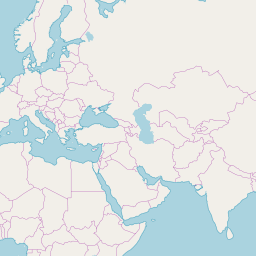

In [69]:
maps = smopy.Map((42., 20., 55., 30.), z=2)
maps.show_ipython()

### Simulated Annealing

In [93]:
def initial_path():
    return np.random.permutation([i for i in range(30)])
def tot_distance(path):
    res = 0.0
    for i in range(0, 29):
        from_ind = path[i]
        to_ind = path[i + 1]
        
        res += haversine(top_cities.iloc[from_ind]["Долгота"], top_cities.iloc[from_ind]["Широта"], top_cities.iloc[to_ind]["Долгота"], top_cities.iloc[to_ind]["Широта"])
        
    return res
def apply_policy(path):
    indices = np.random.choice(range(30), size=2, replace=False)
    
    n_path = copy(path)
    n_path[indices[0]] = path[indices[1]]
    n_path[indices[1]] = path[indices[0]]
    
    return n_path
def energy_distr(path, temperature):
    return np.exp(-tot_distance(path) / temperature)
def experiment(decay, init_temperature):
    np.random.seed(0)
    
    timestep = 0
    temperature = init_temperature

    cur_path = initial_path()
    distances = []
    while temperature > 1.0:
        proposal_path = apply_policy(cur_path)
        acceptance_ratio = energy_distr(proposal_path, temperature) / energy_distr(cur_path, temperature)
        if np.random.sample() <= acceptance_ratio:
            cur_path = proposal_path

        temperature = temperature * decay
        timestep += 1

        if timestep % 10 == 0:
            print("---")
            print("Iteration {}".format(timestep))
            print("Temperature: {}".format(temperature))
            print("Total distance: {}".format(tot_distance(cur_path)))
            print()

            distances.append(tot_distance(cur_path))
            
    return distances

### Experiments

#### Small annealing

In [112]:
distances_small1 = experiment(0.995, init_temperature=25000)

---
Iteration 10
Temperature: 23777.753261644295
Total distance: 53918.198070649945

---
Iteration 20
Temperature: 22615.262006865436
Total distance: 46461.133850290265

---
Iteration 30
Temperature: 21509.60479786739
Total distance: 65081.241936877006

---
Iteration 40
Temperature: 20458.003025566846
Total distance: 63253.53356856843

---
Iteration 50
Temperature: 19457.813926716037
Total distance: 52397.40204316053

---
Iteration 60
Temperature: 18506.5239424176
Total distance: 62674.251971116355

---
Iteration 70
Temperature: 17601.742401340736
Total distance: 67822.64102688202

---
Iteration 80
Temperature: 16741.1955117641
Total distance: 67025.31561624599

---
Iteration 90
Temperature: 15922.720647346945
Total distance: 61060.79194638196

---
Iteration 100
Temperature: 15144.260912268193
Total distance: 61902.6834238715

---
Iteration 110
Temperature: 14403.859972075092
Total distance: 61295.49425116462

---
Iteration 120
Temperature: 13699.65713725105
Total distance: 65772.41420

---
Iteration 980
Temperature: 183.89043472091933
Total distance: 29678.06257295963

---
Iteration 990
Temperature: 174.90005535882108
Total distance: 29233.52003441984

---
Iteration 1000
Temperature: 166.34921447079898
Total distance: 29233.52003441984

---
Iteration 1010
Temperature: 158.21642307820022
Total distance: 29075.561253837

---
Iteration 1020
Temperature: 150.48124279573477
Total distance: 28665.443091923542

---
Iteration 1030
Temperature: 143.12423446810283
Total distance: 28482.6320260406

---
Iteration 1040
Temperature: 136.126909317771
Total distance: 27807.808912796434

---
Iteration 1050
Temperature: 129.4716824811275
Total distance: 27807.808912796434

---
Iteration 1060
Temperature: 123.14182881624814
Total distance: 27807.808912796434

---
Iteration 1070
Temperature: 117.12144087121551
Total distance: 27833.213926193126

---
Iteration 1080
Temperature: 111.39538890736097
Total distance: 27833.213926193126

---
Iteration 1090
Temperature: 105.9492828769655
Total 

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in double_scalars


---
Iteration 1360
Temperature: 27.373468019976514
Total distance: 21400.103765336033

---
Iteration 1370
Temperature: 26.035182739780495
Total distance: 21400.103765336033

---
Iteration 1380
Temperature: 24.762326052332835
Total distance: 21400.103765336033

---
Iteration 1390
Temperature: 23.551699162270268
Total distance: 21400.103765336033

---
Iteration 1400
Temperature: 22.40025966291748
Total distance: 21400.103765336033

---
Iteration 1410
Temperature: 21.30511389046461
Total distance: 21400.103765336033

---
Iteration 1420
Temperature: 20.26350965194792
Total distance: 21400.103765336033

---
Iteration 1430
Temperature: 19.27282930875861
Total distance: 21400.103765336033

---
Iteration 1440
Temperature: 18.33058319829795
Total distance: 21400.103765336033

---
Iteration 1450
Temperature: 17.434403377246852
Total distance: 21400.103765336033

---
Iteration 1460
Temperature: 16.582037670726148
Total distance: 21400.103765336033

---
Iteration 1470
Temperature: 15.7713440123926

In [114]:
distances_small2 = experiment(0.9925, init_temperature=25000)

---
Iteration 10
Temperature: 23187.03208775658
Total distance: 53918.198070649945

---
Iteration 20
Temperature: 21505.538281546127
Total distance: 46461.133850290265

---
Iteration 30
Temperature: 19945.9842479475
Total distance: 65081.241936877006

---
Iteration 40
Temperature: 18499.527071161836
Total distance: 63253.53356856843

---
Iteration 50
Temperature: 17157.965112294038
Total distance: 52397.40204316053

---
Iteration 60
Temperature: 15913.691504774792
Total distance: 62674.251971116355

---
Iteration 70
Temperature: 14759.651022234893
Total distance: 67822.64102688202

---
Iteration 80
Temperature: 13689.300074265984
Total distance: 67025.31561624599

---
Iteration 90
Temperature: 12696.569603237354
Total distance: 61060.79194638196

---
Iteration 100
Temperature: 11775.83067178797
Total distance: 61902.6834238715

---
Iteration 110
Temperature: 10921.862545869431
Total distance: 58623.53338302918

---
Iteration 120
Temperature: 10129.82309236565
Total distance: 63596.9705

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in double_scalars


---
Iteration 890
Temperature: 30.767963093789383
Total distance: 24685.089217810324

---
Iteration 900
Temperature: 28.53670990122418
Total distance: 24685.089217810324

---
Iteration 910
Temperature: 26.467264326347443
Total distance: 24685.089217810324

---
Iteration 920
Temperature: 24.54789228840613
Total distance: 24685.089217810324

---
Iteration 930
Temperature: 22.76771064712261
Total distance: 24685.089217810324

---
Iteration 940
Temperature: 21.116625493583562
Total distance: 24685.089217810324

---
Iteration 950
Temperature: 19.585274916194425
Total distance: 24685.089217810324

---
Iteration 960
Temperature: 18.16497591717336
Total distance: 24685.089217810324

---
Iteration 970
Temperature: 16.84767517859297
Total distance: 24685.089217810324

---
Iteration 980
Temperature: 15.62590339880541
Total distance: 24685.089217810324

---
Iteration 990
Temperature: 14.492732940331425
Total distance: 24685.089217810324

---
Iteration 1000
Temperature: 13.441738549070058
Total dis

In [102]:
distances = experiment(0.99, init_temperature=25000)

---
Iteration 10
Temperature: 22609.55187522011
Total distance: 53918.198070649945

---
Iteration 20
Temperature: 20447.673439930764
Total distance: 46461.133850290265

---
Iteration 30
Temperature: 18492.509334706996
Total distance: 65081.241936877006

---
Iteration 40
Temperature: 16724.293964241995
Total distance: 63253.53356856843

---
Iteration 50
Temperature: 15125.1516784384
Total distance: 52397.40204316053

---
Iteration 60
Temperature: 13678.916059769019
Total distance: 62674.251971116355

---
Iteration 70
Temperature: 12370.966490005165
Total distance: 67822.64102688202

---
Iteration 80
Temperature: 11188.080344095255
Total distance: 63966.58244762362

---
Iteration 90
Temperature: 10118.299316958086
Total distance: 63178.355557044015

---
Iteration 100
Temperature: 9150.80853183072
Total distance: 61189.60991980969

---
Iteration 110
Temperature: 8275.827208025337
Total distance: 56460.054409708886

---
Iteration 120
Temperature: 7484.509782808276
Total distance: 60259.198

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in double_scalars


---
Iteration 660
Temperature: 32.89792021880864
Total distance: 27131.075255044303

---
Iteration 670
Temperature: 29.75228935096026
Total distance: 27131.075255044303

---
Iteration 680
Temperature: 26.907437179483793
Total distance: 27131.075255044303

---
Iteration 690
Temperature: 24.3346038695506
Total distance: 27131.075255044303

---
Iteration 700
Temperature: 22.007779542061453
Total distance: 27131.075255044303

---
Iteration 710
Temperature: 19.90344132858585
Total distance: 27131.075255044303

---
Iteration 720
Temperature: 18.000315568562467
Total distance: 27131.075255044303

---
Iteration 730
Temperature: 16.279162744709808
Total distance: 27131.075255044303

---
Iteration 740
Temperature: 14.72258298246668
Total distance: 27131.075255044303

---
Iteration 750
Temperature: 13.314840147172529
Total distance: 27131.075255044303

---
Iteration 760
Temperature: 12.041702760710425
Total distance: 27131.075255044303

---
Iteration 770
Temperature: 10.890300129370544
Total dist

#### Medium annealing

In [108]:
distances_medium = experiment(0.98, init_temperature=25000)

---
Iteration 10
Temperature: 20426.820172188673
Total distance: 53918.198070649945

---
Iteration 20
Temperature: 16690.199293877355
Total distance: 46461.133850290265

---
Iteration 30
Temperature: 13637.10798456092
Total distance: 65081.241936877006

---
Iteration 40
Temperature: 11142.510098773768
Total distance: 63253.53356856843

---
Iteration 50
Temperature: 9104.24200217792
Total distance: 49787.77787115923

---
Iteration 60
Temperature: 7438.828567303012
Total distance: 58285.72380861712

---
Iteration 70
Temperature: 6078.064537441541
Total distance: 62630.37893673317

---
Iteration 80
Temperature: 4966.221252051018
Total distance: 60124.87451433634

---
Iteration 90
Temperature: 4057.7643380379122
Total distance: 57629.65663538103

---
Iteration 100
Temperature: 3315.488897368825
Total distance: 58994.4398477582

---
Iteration 110
Temperature: 2708.9958195776426
Total distance: 53266.94234097776

---
Iteration 120
Temperature: 2213.446818148935
Total distance: 51092.59637594

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in double_scalars


---
Iteration 330
Temperature: 31.808631668453835
Total distance: 26606.803603729884

---
Iteration 340
Temperature: 25.989967960595685
Total distance: 26606.803603729884

---
Iteration 350
Temperature: 21.23569607248133
Total distance: 26606.803603729884

---
Iteration 360
Temperature: 17.351109796153168
Total distance: 26606.803603729884

---
Iteration 370
Temperature: 14.17711998375688
Total distance: 26606.803603729884

---
Iteration 380
Temperature: 11.583739218709766
Total distance: 26606.803603729884

---
Iteration 390
Temperature: 9.464758317684547
Total distance: 26606.803603729884

---
Iteration 400
Temperature: 7.733396645142769
Total distance: 26606.803603729884

---
Iteration 410
Temperature: 6.31874810362154
Total distance: 26606.803603729884

---
Iteration 420
Temperature: 5.162877249041416
Total distance: 26606.803603729884

---
Iteration 430
Temperature: 4.218446605490125
Total distance: 26606.803603729884

---
Iteration 440
Temperature: 3.4467780086530597
Total distan

#### Big annealing

In [110]:
distances_big = experiment(0.97, init_temperature=25000)

---
Iteration 10
Temperature: 18435.60317237321
Total distance: 53918.198070649945

---
Iteration 20
Temperature: 13594.858573168676
Total distance: 46461.133850290265

---
Iteration 30
Temperature: 10025.176713578938
Total distance: 54597.70210027739

---
Iteration 40
Temperature: 7392.80718497831
Total distance: 54470.41391739308

---
Iteration 50
Temperature: 5451.634383685181
Total distance: 52283.95673168656

---
Iteration 60
Temperature: 4020.166725539414
Total distance: 52431.454638128846

---
Iteration 70
Temperature: 2964.5679375529435
Total distance: 56390.53658204963

---
Iteration 80
Temperature: 2186.1439229706766
Total distance: 48146.15494930969

---
Iteration 90
Temperature: 1612.1152736633044
Total distance: 49246.31942110347

---
Iteration 100
Temperature: 1188.8126981351402
Total distance: 45359.99960588771

---
Iteration 110
Temperature: 876.6591659639096
Total distance: 44528.637736048855

---
Iteration 120
Temperature: 646.4696200453718
Total distance: 44412.92321

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in double_scalars


---
Iteration 220
Temperature: 30.74125173074153
Total distance: 30456.790045045105

---
Iteration 230
Temperature: 22.669340717199272
Total distance: 30456.790045045105

---
Iteration 240
Temperature: 16.71691878566432
Total distance: 30456.790045045105

---
Iteration 250
Temperature: 12.327459239891931
Total distance: 30456.790045045105

---
Iteration 260
Temperature: 9.09056586681012
Total distance: 30456.790045045105

---
Iteration 270
Temperature: 6.70360259731329
Total distance: 30456.790045045105

---
Iteration 280
Temperature: 4.943398292374324
Total distance: 30456.790045045105

---
Iteration 290
Temperature: 3.6453811696480143
Total distance: 30456.790045045105

---
Iteration 300
Temperature: 2.6881920262268983
Total distance: 30456.790045045105

---
Iteration 310
Temperature: 1.9823376578662784
Total distance: 30456.790045045105

---
Iteration 320
Temperature: 1.4618236165629772
Total distance: 30456.790045045105

---
Iteration 330
Temperature: 1.0779840041183395
Total dista

#### Plots

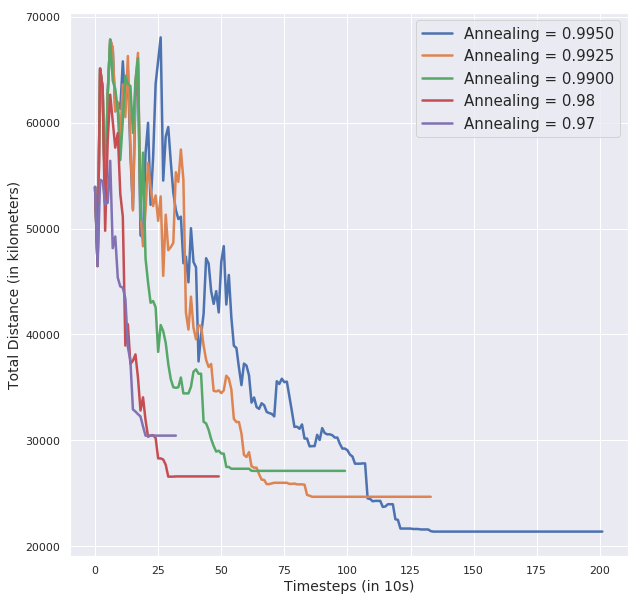

In [157]:
plt.figure(figsize=(10,10))
plt.xlabel("Timesteps (in 10s)", fontsize=14)
plt.ylabel("Total Distance (in kilometers)", fontsize=14)
plt.plot(distances_small1, label="Annealing = 0.9950", linewidth=2.5)
plt.plot(distances_small2, label="Annealing = 0.9925", linewidth=2.5)
plt.plot(distances, label="Annealing = 0.9900", linewidth=2.5)
plt.plot(distances_medium, label="Annealing = 0.98", linewidth=2.5)
plt.plot(distances_big, label="Annealing = 0.97", linewidth=2.5)
plt.legend(prop = {"size": 15})
plt.show()